In [8]:
from odlib import *

iterations=10000 # Monte Carlo Iterations
inputFile="/home/soonali/Desktop/SoongSSP2022/input/SoongInput.txt" # Input File path
sunFile="/home/soonali/Desktop/SoongSSP2022/input/1999GJ2SunPos.txt" # Path for file containing times and sun positions for ephemeris generation
fitsFiles=["/home/soonali/Desktop/SoongSSP2022/fits/0628.fits", 
           "/home/soonali/Desktop/SoongSSP2022/fits/0712.fits", 
           "/home/soonali/Desktop/SoongSSP2022/fits/0714.fits"] # Fits Files path
dates=['2022-06-28 04:33:44.089','2022-07-12 04:16:40.826','2022-07-14 04:41:39.025'] # Dates selected
results=[1.535501123505049E+00, 1.980131722243141E-01, 1.127908127242095E+01, 
         1.961976310756240E+02, 1.425325538303718E+02, 3.163937598615976E+02, 
         2459856.859881772194] # [a,e,i,o,w,m,T], results from JPL horizons for 2022-07-12 04:16:40.826

--- Results from orbital elements determination ---
Semi-major axis: 
	actual: 1.535501123505049 
	calculated: 1.5347335844052366 
	error: 0.04998622847376947
Eccentricity: 
	actual: 0.1980131722243141 
	calculated: 0.19705335529721238 
	error: 0.48472377686794854
Inclination: 
	actual: 11.27908127242095 
	calculated: 11.297804647358708 
	error: 0.16600088682346967
Longitude of Ascending Node: 
	actual: 196.197631075624 
	calculated: 196.30886625285262 
	error: 0.05669547415980082
Argument of perihelion: 
	actual: 142.5325538303718 
	calculated: 142.49765048391222 
	error: 0.02448798223394676
Time of Perihelion Passage T: 
	actual: 2459161.8777567465 
	calculated: 2459162.648031663 
	error: 3.132266011566561e-05

--- Monte Carlo Simulation ---


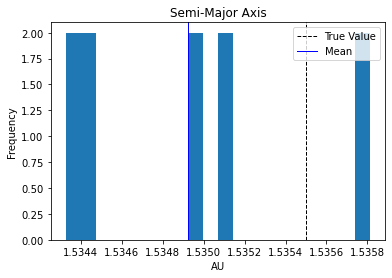

Semi-Major Axis: 
	mean: 1.5349248884092122
	error: 0.03752749425031829
	standard deviation of mean: 0.0005369673986269885



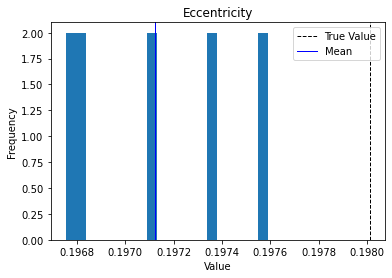

Eccentricity: 
	mean: 0.19712115591472293
	error: 0.45048331864543023
	standard deviation of mean: 0.0003174859931535609



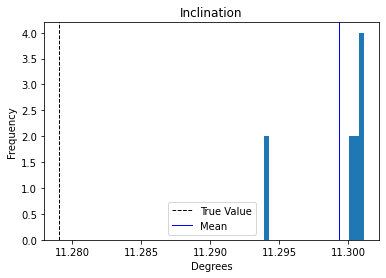

Inclination: 
	mean: 11.299316762700212
	error: 0.17940725658871612
	standard deviation of mean: 0.0027439568203767952



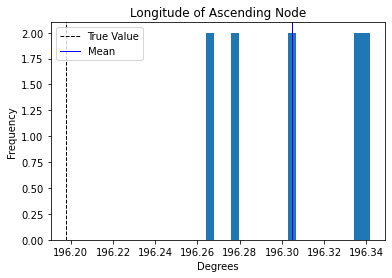

Longitude of Ascending Node: 
	mean: 196.30492157136536
	error: 0.05468490886110538
	standard deviation of mean: 0.030523087698878876



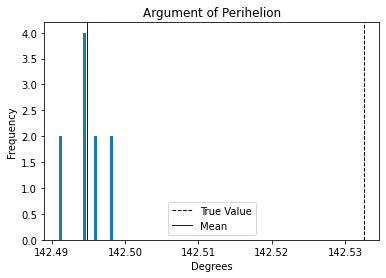

Argument of Perihelion: 
	mean: 142.49487440794647
	error: 0.026435660775551484
	standard deviation of mean: 0.002366097826808776



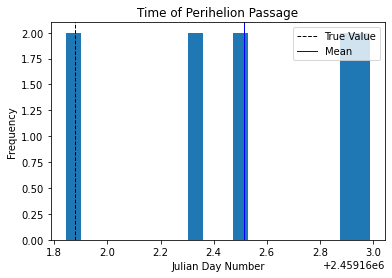

Time of Perihelion Passage: 
	mean: 2459162.5151787465
	error: 2.592029446387861e-05
	standard deviation of mean: 0.41865575912768915

--- Ephemeris generation completed ---


In [7]:
RunCompleteOD(iterations, inputFile, fitsFiles, sunFile, dates, results)

Finished generating ephemeris
